In [266]:
%load_ext autoreload
%autoreload 2

import sys 
import os 

home = os.path.join('..','..')

pths = [os.path.join(home, 'pincam')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)
        
from pincam.utils import *
from pincam import Pincam 
from pincam.matrix_utils2 import MatrixUtils2 as mu

from ladybug_geometry.geometry2d.line import LineSegment2D

import matplotlib.pyplot as plt

r = lambda d: d / 180. * np.pi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


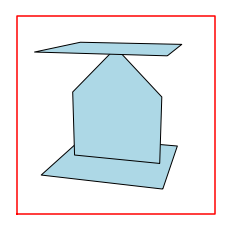

In [267]:
# Define surfaces
bot_srf = np.array(
    [[-5, -5, 0], [5, -5, 0], [5, 5, 0], [-5, 5, 0]])
top_srf = np.array(
    [[-5, -5, 10], [5, -5, 10], [5, 5, 10], [-5, 5, 10]])
vrt_srf = np.array(
    [[-4, 0, 0], [4, 0, 0], [4, 0, 6], [0, 0, 10], [-4, 0, 6]])
ptmtx = [top_srf, bot_srf, vrt_srf] 

# Plot
focal_length = 35
heading = r(15)
pitch = r(15)
cam_point = np.array([0, -35, 4])
pincam = Pincam(cam_point, heading, pitch, focal_length)

df = gpd.GeoDataFrame({})
df['geometry'] = pincam.to_gpd_geometry(ptmtx)
#pincam.heading = 45
#df['geometry'] = pincam.to_gpd_geometry(ptmtx)

# Plot
f, a = plt.subplots(figsize=(4, 4))
df.plot(edgecolor='black', alpha=1, ax=a, facecolor='lightblue')
b = pincam.sensor_bounds(100)
a.plot(b[:,0], b[:,1], 'red')
a.grid(False)
_ = a.axis(False)

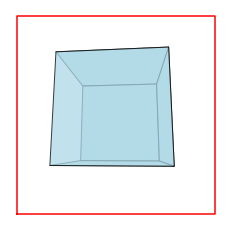

In [268]:
# Define surfaces
# bot_srf = np.array(
#     [[-5, -5, 0], [5, -5, 0], [5, 5, 0], [-5, 5, 0]])
# top_srf = np.array(
#     [[-5, -5, 10], [5, -5, 10], [5, 5, 10], [-5, 5, 10]])
# vrt_srf = np.array(
#     [[-4, 0, 0], [4, 0, 0], [4, 0, 6], [0, 0, 10], [-4, 0, 6]])
# ptmtx = [vrt_srf, top_srf, bot_srf]

bot_box = np.array(
    [[-10, -10, -10], [10, -10, -10], [10, 10, -10], [-10, 10, -10]])
top_box = np.array(
    [[-10, -10, 10], [10, -10, 10], [10, 10, 10], [-10, 10, 10]])
side_box1 = np.array(
    [[-10, -10, -10], [10, -10, -10], [10, -10, 10], [-10, -10, 10]])
side_box2 = np.array(
    [[-10, 10, -10], [10, 10, -10], [10, 10, 10], [-10, 10, 10]])
side_box3 = np.array(
    [[-10, -10, -10], [-10, 10, -10], [-10, 10, 10], [-10, -10, 10]])
side_box4 = np.array(
    [[10, -10, -10], [10, 10, -10], [10, 10, 10], [10, -10, 10]])

ptmtx = [bot_box, top_box, side_box1, side_box2, side_box3]
# Plot
focal_length = 19
heading = r(5)
pitch = r(-10)
cam_point = np.array([0, -45, 0])
cam = Pincam(cam_point, heading, pitch, focal_length)

# Plot
f, a = plt.subplots(figsize=(4, 4))
df = gpd.GeoDataFrame({})
df['geometry'] = cam.to_gpd_geometry(ptmtx)
df.plot(edgecolor='black', alpha=0.75, ax=a, facecolor='lightblue')
b = pincam.sensor_bounds(100)
a.plot(b[:,0], b[:,1], 'red')
a.grid(False)
_ = a.axis(False)

In [269]:
# w = [xsrf[:, 1].tolist() for xsrf in xsrfs]
# w = [w3 for w2 in w for w3 in w2]
# for i in range(len(xsrfs)):
#     _w = xsrfs[i][:,1]
#     _w = (_w - min(w)) / (max(w) - min(w)) * 50
#     xsrfs[i][:, 1] = _w

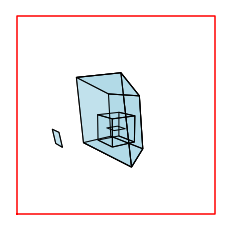

In [274]:
xsrfs = [cam.fit_to_view_frustum(cam.P, pts) for pts in ptmtx]
origin = np.array(
    [[-1, -1, 0], [1, -1, 0], [1, 1, 0], [-1, 1, 0]]) * 5

sensor = np.array(
    [[-1, 0, -1], [1, 0, -1], [1, 0, 1], [-1, 0, 1]]) * 5
sensor = np.insert(sensor, 3, 1, 1)
Rt = cam.extrinsic_matrix(cam.heading, cam.pitch, cam.cam_point)
iRt = Pincam.invert_extrinsic_matrix(Rt)
#iRt = np.eye(4)
#iRt[:3, 3] = Rt[:3, 3]
#iRt = np.copy(Rt)
sensor1 = sensor[:, :3]
sensor2 = np.matmul(iRt, sensor.T).T[:, :3]

#move = cam_point
#xf = mu.xform_translation_matrix(move)
xf = Pincam.invert_extrinsic_matrix(Rt)
xsrfs = [np.insert(xsrf, 3, 1, 1) for xsrf in xsrfs]
xsrfs = [np.matmul(xf, xsrf.T).T for xsrf in xsrfs] 
xsrfs = [xsrf[:, :3] for xsrf in xsrfs]

focal_length = 18
heading = r(55)
pitch = r(10)
cam_point2 = np.array([0, -150, 10])
cam2 = Pincam(cam_point2, heading, pitch, focal_length)
df = gpd.GeoDataFrame({})
df['geometry'] = cam2.to_gpd_geometry(
    xsrfs + [origin, sensor2] +
    ptmtx)# + [box])

# Plot
f, a = plt.subplots(figsize=(4, 4))
a = df.plot(edgecolor='black', alpha=0.75, ax=a, facecolor='lightblue')
a = df.plot(edgecolor='black', facecolor="none", ax=a)
b = pincam.sensor_bounds(100)
a.plot(b[:,0], b[:,1], 'red')
a.grid(False) 
_ = a.axis(False)